# 라이브러리 및 데이터 불러오기


In [3]:
import pandas as pd
file_url="https://media.githubusercontent.com/media/musthave-ML10/data_source/main/titanic.csv"
data = pd.read_csv(file_url)

# 데이터 확인하기


In [4]:
data.head()


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Name      889 non-null    object 
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Ticket    889 non-null    object 
 7   Embarked  889 non-null    object 
 8   Survived  889 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 62.6+ KB


In [6]:
data.describe()

,Pclass,Age,SibSp,Parch,Survived
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,2.311586,29.315152,0.524184,0.382452,0.382452
std,0.834700,12.984932,1.103705,0.806761,0.486260
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,0.000000
75%,3.000000,35.000000,1.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,1.000000


In [7]:
numeric_data = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Survived']] 
# 숫자형 데이터만 있는 열을 가져와야함
numeric_data.corr()

,Pclass,Age,SibSp,Parch,Survived
Pclass,1.000000,-0.336512,0.081656,0.016824,-0.335549
Age,-0.336512,1.000000,-0.232543,-0.171485,-0.069822
SibSp,0.081656,-0.232543,1.000000,0.414542,-0.034040
Parch,0.016824,-0.171485,0.414542,1.000000,0.083151
Survived,-0.335549,-0.069822,-0.034040,0.083151,1.000000


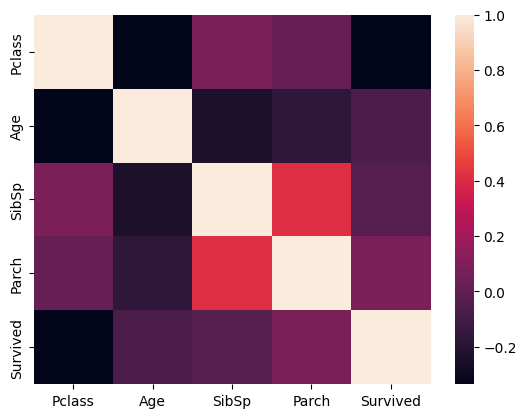

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(numeric_data.corr())
plt.show()

<Axes: >

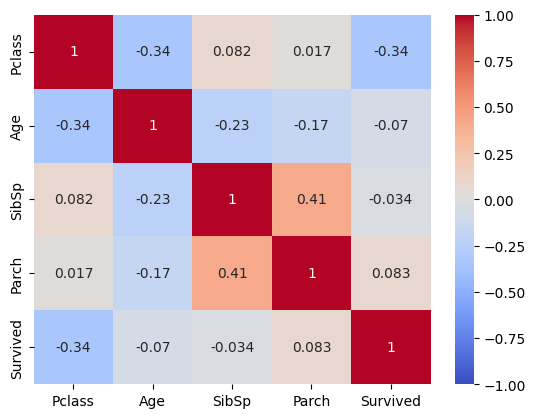

In [9]:
sns.heatmap(numeric_data.corr(), cmap="coolwarm", vmin=-1,vmax=1,annot=True)

## 전처리: 범주형 변수 변환하기(더미 변수와 원-핫 인코딩)

In [10]:
print(data["Name"].nunique())
print(data["Sex"].nunique())
print(data["Ticket"].nunique())
print(data["Embarked"].nunique())

#데이터 셋에 있는 object 각 변수마다 고윳값이 몇가지 인지 확인


889
2
680
3


In [11]:
data = data.drop(["Name","Ticket"], axis=1)
data.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,male,22.0,1,0,S,0
1,1,female,38.0,1,0,C,1
2,3,female,26.0,0,0,S,1
3,1,female,35.0,1,0,S,1
4,3,male,35.0,0,0,S,0


In [12]:
dummy_data = pd.get_dummies(data,columns=["Sex", "Embarked"], drop_first= True)
dummy_data = dummy_data.astype(int)
dummy_data

,Pclass,Age,SibSp,Parch,Survived,Sex_male,Embarked_Q,Embarked_S
0,3,22,1,0,0,1,0,1
1,1,38,1,0,1,0,0,0
2,3,26,0,0,1,0,0,1
3,1,35,1,0,1,0,0,1
4,3,35,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...
884,2,27,0,0,0,1,0,1
885,1,19,0,0,1,0,0,1
886,3,28,1,2,0,0,0,1
887,1,26,0,0,1,1,0,0


In [13]:
# data = pd.merge(data, dummy_data)
# data = data.drop(["Sex","Embarked"],axis=1)
dummy_data.info()
# pd.concat([data,dummy_data])
dummy_data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Pclass      889 non-null    int32
 1   Age         889 non-null    int32
 2   SibSp       889 non-null    int32
 3   Parch       889 non-null    int32
 4   Survived    889 non-null    int32
 5   Sex_male    889 non-null    int32
 6   Embarked_Q  889 non-null    int32
 7   Embarked_S  889 non-null    int32
dtypes: int32(8)
memory usage: 27.9 KB


,Pclass,Age,SibSp,Parch,Survived,Sex_male,Embarked_Q,Embarked_S
0,3,22,1,0,0,1,0,1
1,1,38,1,0,1,0,0,0
2,3,26,0,0,1,0,0,1
3,1,35,1,0,1,0,0,1
4,3,35,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...
884,2,27,0,0,0,1,0,1
885,1,19,0,0,1,0,0,1
886,3,28,1,2,0,0,0,1
887,1,26,0,0,1,1,0,0


In [14]:
from sklearn.model_selection import train_test_split
X= dummy_data.drop("Survived",axis=1)
y= dummy_data["Survived"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)


In [15]:
X_train.shape
X_test.shape

(178, 7)

## 모델링 및 예측하기

In [16]:
from sklearn.linear_model import LogisticRegression #로지스틱 회귀 임포트
model = LogisticRegression() # 모델 생성
model.fit(X_train,y_train) #모델 학습

pred = model.predict(X_test) #예측



## 예측 모델 평가하기

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.7808988764044944

In [18]:
model.coef_

array([[-1.1827016 , -0.03989481, -0.32134997,  0.00776803, -2.56838276,
        -0.07793073, -0.23390321]])

In [19]:
len(model.coef_[0])

7

In [20]:
pd.Series(model.coef_[0], index=X.columns)

Pclass       -1.182702
Age          -0.039895
SibSp        -0.321350
Parch         0.007768
Sex_male     -2.568383
Embarked_Q   -0.077931
Embarked_S   -0.233903
dtype: float64

## 피처 엔지니어링

In [21]:
dummy_data["family"] = dummy_data["SibSp"] + dummy_data["Parch"]
dummy_data.drop(["SibSp","Parch"], axis=1, inplace= True)
dummy_data.head()

,Pclass,Age,Survived,Sex_male,Embarked_Q,Embarked_S,family
0,3,22,0,1,0,1,1
1,1,38,1,0,0,0,1
2,3,26,1,0,0,1,0
3,1,35,1,0,0,1,1
4,3,35,0,1,0,1,0


In [22]:
X =dummy_data.drop("Survived", axis=1)
y = dummy_data["Survived"]
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)
model = LogisticRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)
accuracy_score(y_test,pred)

0.7921348314606742

### 데이터 넣어서 생존가능성 확인하기


In [27]:
import numpy as np
# 순서대로[pclass, age,sex,embark_q,embark_s,family]
wonjun = np.array([[3,27,1,0,0,0]])
jamminWonjun = np.array([[2,5,1,0,0,0]])
yejin = np.array([[2,25,0,1,0,0]])
jieun = np.array([[1,24,0,0,1,4]])

people = [wonjun,jamminWonjun,yejin,jieun]
for human in people:
    print(model.predict(human))
    print(model.predict_proba(human))    

# print(model.predict(jamminWonjun))
# print(model.predict(wonjun))

[0]
[[0.87133005 0.12866995]]
[1]
[[0.46885594 0.53114406]]
[1]
[[0.13893014 0.86106986]]
[1]
[[0.09987044 0.90012956]]


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but L

## 이걸 토대로 데이터 입력받으면 사망이나 생존 출력해주는 프로그램 만들기

In [25]:
#데이터 받는 함수
#출력하는 함수
#생존가능성 계산하는 함수

class Info:
    def __init__(self):
        self.class_num = None
        self.age = None
        self.sex = None
        self.embark = None
        self.family = None

    def get_data(self):
        self.class_num = int(input("당신의 티켓 등급 (1, 2, 3): "))
        self.age = int(input("당신의 나이: "))
        self.sex = int(input("당신의 성별 (0: 여성, 1: 남성): "))
        self.embark = int(input("당신이 탑승한 곳 (0: S, 1: C, 2: Q): "))
        self.family = int(input("같이 탑승한 가족 수: "))

    def display_data(self):
        print("당신의 정보:")
        print(f"티켓 등급: {self.class_num}")
        print(f"나이: {self.age}")
        print(f"성별: {'여성' if self.sex == 0 else '남성'}")
        print(f"탑승한 곳: {'S' if self.embark == 0 else 'C' if self.embark == 1 else 'Q'}")
        print(f"같이 탑승한 가족 수: {self.family}")

    def calculate_survival_probability(self):
        X = np.array([[self.class_num, self.age, self.sex, 0, self.family, self.embark]])
        survival_probability = model.predict_proba(X)[:, 1]
        print(f"생존 가능성: {survival_probability[0] * 100:.2f}%")

info_obj = Info()
info_obj.get_data()
info_obj.display_data()
info_obj.calculate_survival_probability()





당신의 정보:
티켓 등급: 1
나이: 5
성별: 여성
탑승한 곳: Q
같이 탑승한 가족 수: 4
생존 가능성: 92.50%


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
